# Install and Import

In [1]:
pip install -U tensorflow-text==2.11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 38.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tenso

In [2]:
!pip install transformers



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 59.3 MB/s eta 0:00:00


In [22]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import tokenize
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer, SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from collections import Counter

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, plot_model
from keras.models import Sequential,load_model
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Input, Flatten, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

import tensorflow_hub as hub
import tensorflow as tf
import tensorflow_text as tf_text
from tensorflow.keras.models import Model
import transformers
from sklearn.metrics import confusion_matrix, classification_report


In [4]:
from tensorflow.keras import Input, layers, models
from tensorflow.keras.layers import Attention

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read Data

In [7]:
df = pd.read_csv('/content/drive/Shareddrives/Riddle mãi mận/DA/0. Final_term/Source code/Dataset/Preprocessed_Reviews.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83189 entries, 0 to 83188
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rating      83189 non-null  int64 
 1   Review      83189 non-null  object
 2   Sentiment   83189 non-null  int64 
 3   word_count  83189 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.5+ MB


In [8]:
df.head()

,Rating,Review,Sentiment,word_count
0,4,['located 4 ton duc thang highclass villa oppo...,2,87
1,4,['hana riverside quang ngai hotel located quie...,2,66
2,5,['dropped 1 night way north friendly helpful s...,2,36
3,4,['stayed one night passing room clean tidy ket...,2,104
4,4,['nice hotel staff facilities work expanding b...,2,37


In [9]:
df['Sentiment'].value_counts()

2    69980
0     6957
1     6252
Name: Sentiment, dtype: int64

# Transform

In [10]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each review.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Review'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 194303 unique tokens.


In [11]:
X = tokenizer.texts_to_sequences(df['Review'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (83189, 250)


In [12]:
Y = pd.get_dummies(df['Sentiment']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (83189, 3)


# Train test split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 100)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(74870, 250) (74870, 3)
(8319, 250) (8319, 3)


## Under sampling

In [14]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=10)
X_resampled_under, Y_resampled_under =rus.fit_resample(X_train, Y_train)

In [15]:
print(X_resampled_under.shape)

(16809, 250)


# Modeling

## LSTM

### Build and Train model

In [ ]:
max_features = 3000
embed_dim = 128
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(256, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(3,activation='sigmoid'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               365568    
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
Total params: 5,366,339
Trainable params: 5,366,339
Non-trainable params: 0
_________________________________________________________________
None


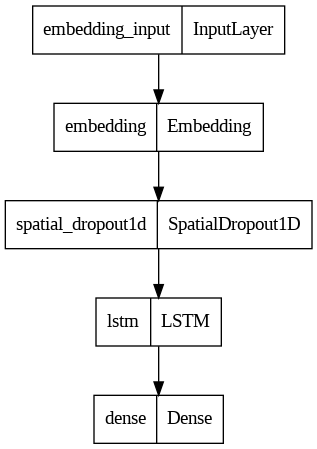

In [ ]:
plot_model(model)

In [ ]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, 
                          epochs=epochs, 
                          batch_size=batch_size,
                          validation_split=0.1,
                          callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])
model.save('/content/drive/Shareddrives/Riddle mãi mận/DA/0. Final_term/Source code/Models/lstm_model2.h5')

Epoch 1/5
1053/1053 [==============================] - 3541s 3s/step - loss: 0.3782 - accuracy: 0.8657 - val_loss: 0.2835 - val_accuracy: 0.8994
Epoch 2/5
1053/1053 [==============================] - 3570s 3s/step - loss: 0.2691 - accuracy: 0.8967 - val_loss: 0.2858 - val_accuracy: 0.9029


In [ ]:
model.save('/content/drive/Shareddrives/Riddle mãi mận/DA/0. Final_term/lstm_model2.h5')

### Evaluate

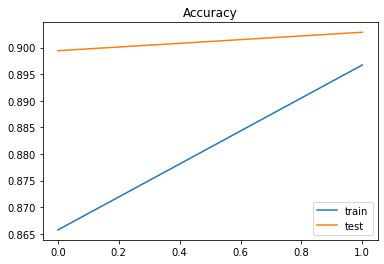

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

260/260 [==============================] - 148s 569ms/step - loss: 0.3073 - accuracy: 0.8963
Test set
  Loss: 0.307
  Accuracy: 0.896


In [ ]:
trial_review = ['Accomodation is very comfortable and homely..',
                'The hotel is in a great location, close to the main shopping area and the waterfront.',
                'We are so pleased we stayed here .Such a great escape from the big city .The air was clean and it was so relaxed.Ken and his wife were super hosts and nothing was too much trouble for the staff.',
                'Breakfast was pretty much the worst thing we had in our Vietnam trip and without repeated demand whether a taxi would come in 10 minutes, we would not have made it to the bus station in time.']
for review in trial_review:
    seq = tokenizer.texts_to_sequences([review])
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = model.predict(padded)
    labels = ['negative', 'neutral', 'positive']
    print(review)
    print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 495ms/step
Accomodation is very comfortable and homely..
[[0.18047106 0.4092604  0.84662354]] positive
1/1 [==============================] - 0s 141ms/step
The hotel is in a great location, close to the main shopping area and the waterfront.
[[0.11849774 0.35817677 0.89426976]] positive
1/1 [==============================] - 0s 211ms/step
We are so pleased we stayed here .Such a great escape from the big city .The air was clean and it was so relaxed.Ken and his wife were super hosts and nothing was too much trouble for the staff.
[[0.04372077 0.2626643  0.970056  ]] positive
1/1 [==============================] - 0s 207ms/step
Breakfast was pretty much the worst thing we had in our Vietnam trip and without repeated demand whether a taxi would come in 10 minutes, we would not have made it to the bus station in time.
[[0.65113616 0.5362594  0.3852938 ]] negative


In [16]:
lstm_model = load_model('/content/drive/Shareddrives/Riddle mãi mận/DA/0. Final_term/Source code/Models/lstm_model2.h5')

In [ ]:
#Predict
y_prediction = lstm_model.predict(X_test)
y_prediction = np.argmax (y_prediction, axis = 1)
y_test=np.argmax(Y_test, axis=1)


In [25]:
y_train = np.argmax(Y_test, axis=1)

In [26]:
#Create confusion matrix and normalizes it over predicted (columns)
result = classification_report(y_train, y_prediction )
print(result)

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       719
           1       0.43      0.07      0.11       649
           2       0.92      0.99      0.95      6951

    accuracy                           0.90      8319
   macro avg       0.68      0.61      0.60      8319
weighted avg       0.87      0.90      0.87      8319



###LSTM with under sample

In [ ]:
epochs = 5
batch_size = 64

history = model.fit(X_resampled_under, Y_resampled_under, 
                          epochs=epochs, 
                          batch_size=batch_size,
                          validation_split=0.1,
                          callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])
model.save('/content/drive/Shareddrives/Riddle mãi mận/DA/0. Final_term/Source code/Models/lstm_under_model.h5')

Epoch 1/5
237/237 [==============================] - 853s 4s/step - loss: 0.8970 - accuracy: 0.5463 - val_loss: 0.2507 - val_accuracy: 0.9131
Epoch 2/5
237/237 [==============================] - 805s 3s/step - loss: 0.6004 - accuracy: 0.7367 - val_loss: 0.6217 - val_accuracy: 0.7817


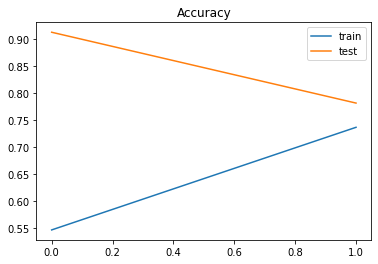

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
history.history

{'loss': [0.8970435261726379, 0.6004180312156677],
 'accuracy': [0.546271800994873, 0.7367133498191833],
 'val_loss': [0.2506656348705292, 0.6217320561408997],
 'val_accuracy': [0.9131469130516052, 0.7816775441169739]}

In [ ]:
trial_review = ['Accomodation is very comfortable and homely..',
                'The hotel is in a great location, close to the main shopping area and the waterfront.',
                'We are so pleased we stayed here .Such a great escape from the big city .The air was clean and it was so relaxed.Ken and his wife were super hosts and nothing was too much trouble for the staff.',
                'Breakfast was pretty much the worst thing we had in our Vietnam trip and without repeated demand whether a taxi would come in 10 minutes, we would not have made it to the bus station in time.']
for review in trial_review:
    seq = tokenizer.texts_to_sequences([review])
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = model.predict(padded)
    labels = ['negative', 'neutral', 'positive']
    print(review)
    print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 1s 1s/step
Accomodation is very comfortable and homely..
[[0.41199327 0.5455637  0.5624646 ]] positive
1/1 [==============================] - 0s 156ms/step
The hotel is in a great location, close to the main shopping area and the waterfront.
[[0.30145738 0.6417058  0.59735006]] neutral
1/1 [==============================] - 0s 133ms/step
We are so pleased we stayed here .Such a great escape from the big city .The air was clean and it was so relaxed.Ken and his wife were super hosts and nothing was too much trouble for the staff.
[[0.1852589 0.5826921 0.8310512]] positive
1/1 [==============================] - 0s 129ms/step
Breakfast was pretty much the worst thing we had in our Vietnam trip and without repeated demand whether a taxi would come in 10 minutes, we would not have made it to the bus station in time.
[[0.6768696  0.6029225  0.17443432]] negative


In [ ]:
eval = model.evaluate(X_test,Y_test)
print(eval)

260/260 [==============================] - 125s 479ms/step - loss: 0.6435 - accuracy: 0.7560
[0.6435104608535767, 0.7559803128242493]


In [27]:
un_lstm_model = load_model('/content/drive/Shareddrives/Riddle mãi mận/DA/0. Final_term/Source code/Models/lstm_under_model.h5')

In [30]:
#Predict
y_prediction = un_lstm_model.predict(X_test)
y_prediction = np.argmax (y_prediction, axis = 1)
y_test=np.argmax(Y_test, axis=1)

260/260 [==============================] - 149s 566ms/step


In [31]:
y_train = np.argmax(Y_test, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
result = classification_report(y_train, y_prediction )
print(result)

              precision    recall  f1-score   support

           0       0.48      0.90      0.63       719
           1       0.18      0.41      0.25       649
           2       0.99      0.77      0.87      6951

    accuracy                           0.76      8319
   macro avg       0.55      0.69      0.58      8319
weighted avg       0.88      0.76      0.80      8319

